___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [2]:
%matplotlib inline
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns

# Probabilidades de erro

No processo pelo qual decidimos qual das duas hipóteses é mais bem suportada por nossos dados, a etapa final envolve um julgamento sobre a consistência dos dados e a hipótese nula. Embora essa etapa resulte em uma boa decisão na grande maioria das vezes, às vezes pode nos desviar do caminho. A razão é a variação do acaso. Por exemplo, mesmo quando a hipótese nula é verdadeira, a variação do acaso pode fazer com que a amostra pareça bem diferente do que a hipótese nula prevê.

## Wrong Conclusions

If you are testing a null hypothesis against the alternative that the null hypothesis isn't true, then there are four ways of classifying reality and the result of the test.

|     | Test Favors the Null | Test Favors the Alternative |
|----:|:-----------------------|:------------------------|
|**Null is True**| Correct result | Error |
|**Alternative is True**| Error | Correct result |

In two out of the four cells of this table, the test result is wrong. One type of error occurs if the test favors the alternative hypothesis when in fact the null hypothesis is true. The other type of error occurs if the test favors the null hypothesis when in fact the alternative hypothesis is true.

Since the null hypothesis is a completely specified chance model, the first type of error has a chance that we can estimate. The answer turns out to be essentially the cutoff that we use for the p-value. Let's see how.

## A chance de um erro
Suponha que você queira testar se uma moeda é honesta ou não. Então as hipóteses são:

**Nulo:** A moeda é honesta. Ou seja, os resultados são como sorteios aleatórios com substituição de *Cara, Coroa*.

**Alternativa:** A moeda não é justa.

Suponha que você vá testar essa hipótese com base em 2.000 lançamentos da moeda. Você esperaria que uma moeda honesta caísse em cara 1.000 vezes em 2.000, portanto, uma estatística de teste razoável a ser usada é

$$
\text{estatística de teste} ~ = ~ \vert ~ \text{número de caras} - 1000 ~ \vert
$$

Pequenos valores dessa estatística favorecem a hipótese nula e grandes valores favorecem a alternativa.

Simulamos essa estatística sob a hipótese nula muitas vezes e desenhamos sua distribuição empírica.

In [4]:
def sample_proportions(sample_size, sample_population):
    return np.random.multinomial(sample_size, sample_population) / sample_size

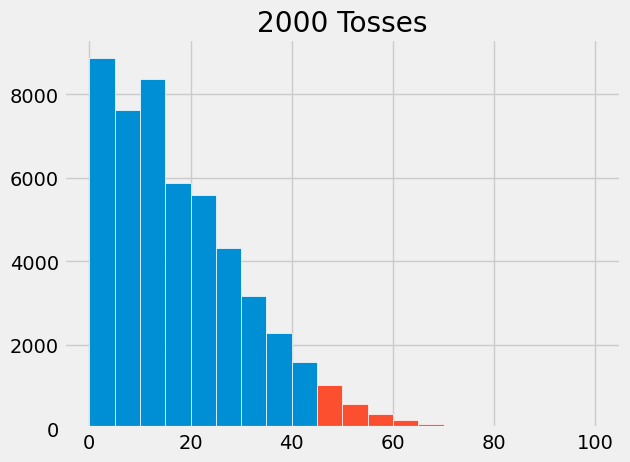

In [12]:
fair_coin = [0.5, 0.5]

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin).item(0)
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = np.array([])
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

results = pd.DataFrame({'|Number of Heads - 1000|': statistics})

plt.hist(results[results['|Number of Heads - 1000|'] < 45], 
         bins = np.arange(0, 101, 5), edgecolor='white')

plt.hist(results[results['|Number of Heads - 1000|'] >= 45], 
         edgecolor='white', bins = np.arange(0, 101, 5))

#results.hist(bins = np.arange(0, 101, 5), edgecolor='white')
plt.title('2000 Tosses');

A área à direita de 45, cor de ouro, é pouco menos de 5%.

In [13]:
np.count_nonzero(statistics >= 45) / repetitions

0.047

Grandes valores da estatística de teste favorecem a alternativa. Portanto, se você quiser usar um corte de 5% para o valor-p, sua regra de decisão seria concluir que a moeda é injusta se a estatística de teste for 45 ou mais.

No entanto, como mostra a figura, uma moeda honesta pode produzir estatísticas de teste com valores de 45 ou mais. Na verdade, o faz com chance de aproximadamente 5%.

Resumo: *Se a moeda for justa* e nosso teste usar um corte de 5% para decidir se ela é justa ou não, haverá cerca de 5% de chance de que o teste conclua erroneamente que a moeda é injusta.

## The Cutoff for the p-value is an Error Probability
The example above is a special case of a general fact:

**If you use a $p$% cutoff for the p-value, and the null hypothesis happens to be true, then there is about a $p$% chance that your test will conclude that the alternative is true.**

Here is the table of the four possible reality/test outcomes again. Probabilities in the top row are computed under the assumption that the null hypothesis is true. The p-value is the probability of the error shown in red.

|     | Test Favors the Null | Test Favors the Alternative |
|----:|:-----------------------|:------------------------|
|**Null is True**| Correct result | <p style="color:red;"><b>Error</b></p> |
|**Alternative is True**| Error | Correct result |

### Controlling for the Error ###
The 1% cutoff is therefore more conservative than 5%. With the 1% cutoff there is less chance of concluding "alternative" if the null happens to be true. For this reason, randomized controlled trials of medical treatments usually use 1% as the cutoff for deciding between the following two hypotheses:

**Null:** The treatment has no effect; the observed differences between the outcomes of the treatment and control groups of patients are due to randomization.

**Alternative:** The treatment has an effect.

The idea is to control the chance of concluding that the treatment does something if in fact it does nothing. This reduces the risk of giving patients a useless treatment.

Still, even if you set the cutoff to be as low as 1%, and the treatment does nothing, there is about a 1% chance of concluding that the treatment does something. This is due to chance variation. There is a small chance that data from random samples end up leading you astray. The advantage of random sampling is that you can find that chance.

## Data Snooping e p-Hacking
A discussão acima implica que, se cada um dos 100 grupos de pesquisa diferentes realizar um experimento controlado randomizado separado sobre o efeito de um tratamento que de fato não tem efeito, e cada experimento usar um corte de 1% para o valor-p, então, por variação aleatória, espera-se que um dos experimentos conclua erroneamente que o tratamento tem efeito.

Infelizmente, esse pode ser o que será publicado. É por isso que é importante que os experimentos sejam *replicados*. Ou seja, outros pesquisadores devem ser capazes de realizar o experimento e ver se obtêm resultados semelhantes.

Não é incomum que os pesquisadores testem várias hipóteses usando os mesmos dados. Por exemplo, em um estudo randomizado controlado sobre o efeito de uma droga, os pesquisadores podem testar se a droga tem efeito em várias doenças diferentes.

Agora suponha que a droga não tenha efeito sobre nada. Apenas por variação casual, uma pequena porcentagem dos testes pode concluir que tem um efeito. Então, quando você ler um estudo que usa testes de hipóteses e conclui que um tratamento tem efeito, sempre pergunte quantos efeitos diferentes foram testados antes que os pesquisadores encontrassem aquele que foi relatado.

Se os pesquisadores executaram vários testes diferentes antes de encontrar um que deu um resultado "estatisticamente altamente significativo", use o resultado com cautela. O estudo pode ser prejudicado por * bisbilhotar dados *, o que significa essencialmente torturar os dados para fazer uma confissão falsa. Às vezes, isso também é chamado de *p-hacking*.

Em tal situação, uma maneira de validar o resultado relatado é replicar o experimento e testar apenas aquele efeito específico. Se for significativo novamente, isso validará a conclusão original.

## Nota técnica: o outro tipo de erro
Existe, claro, outro tipo de erro: concluir que o tratamento não faz nada quando na verdade faz alguma coisa. As discussões sobre esse erro estão fora do escopo deste curso. Apenas saiba que a vida não é fácil: se você configurar seu teste para reduzir um dos dois erros, quase sempre aumentará o outro.